In [1]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = 'CarPricesPrediction.csv' 
car_price_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(car_price_data.head())


First few rows of the dataset:
   Unnamed: 0       Make      Model  Year  Mileage  Condition     Price
0           0       Ford  Silverado  2022    18107  Excellent  19094.75
1           1     Toyota  Silverado  2014    13578  Excellent  27321.10
2           2  Chevrolet      Civic  2016    46054       Good  23697.30
3           3       Ford      Civic  2022    34981  Excellent  18251.05
4           4  Chevrolet      Civic  2019    63565  Excellent  19821.85


In [2]:
print("Dataset Information:")
print(car_price_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB
None


In [3]:
# Assuming the current year is 2024
current_year = 2024
car_price_data['Car_Age'] = current_year - car_price_data['Year']

In [4]:
car_price_data['Make_Model'] = car_price_data['Make'] + '_' + car_price_data['Model']

In [5]:
condition_mapping = {
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}

car_price_data['Condition_Numeric'] = car_price_data['Condition'].map(condition_mapping)

In [6]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, np.inf]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k+']

car_price_data['Mileage_Bracket'] = pd.cut(car_price_data['Mileage'], bins=bins, labels=labels)


In [7]:
print("First few rows of the dataset:")
print(car_price_data.head())


First few rows of the dataset:
   Unnamed: 0       Make      Model  Year  Mileage  Condition     Price  \
0           0       Ford  Silverado  2022    18107  Excellent  19094.75   
1           1     Toyota  Silverado  2014    13578  Excellent  27321.10   
2           2  Chevrolet      Civic  2016    46054       Good  23697.30   
3           3       Ford      Civic  2022    34981  Excellent  18251.05   
4           4  Chevrolet      Civic  2019    63565  Excellent  19821.85   

   Car_Age        Make_Model  Condition_Numeric Mileage_Bracket  
0        2    Ford_Silverado                  3         10k-20k  
1       10  Toyota_Silverado                  3         10k-20k  
2        8   Chevrolet_Civic                  2         40k-50k  
3        2        Ford_Civic                  3         30k-40k  
4        5   Chevrolet_Civic                  3         60k-70k  


In [8]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Make', 'Model', 'Condition', 'Make_Model', 'Mileage_Bracket']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    car_price_data[column] = encoder.fit_transform(car_price_data[column])

# Display the dataset with encoded features
print(car_price_data)

     Unnamed: 0  Make  Model  Year  Mileage  Condition     Price  Car_Age  \
0             0     1      4  2022    18107          0  19094.75        2   
1             1     4      4  2014    13578          0  27321.10       10   
2             2     0      2  2016    46054          2  23697.30        8   
3             3     1      2  2022    34981          0  18251.05        2   
4             4     0      2  2019    63565          0  19821.85        5   
..          ...   ...    ...   ...      ...        ...       ...      ...   
995         995     3      1  2010   149032          0  24548.50       14   
996         996     0      3  2014    20608          0  26969.70       10   
997         997     1      0  2016   109851          2  20507.55        8   
998         998     4      4  2010    11704          2  31414.90       14   
999         999     3      4  2017   128390          0  18580.60        7   

     Make_Model  Condition_Numeric  Mileage_Bracket  
0             9      

In [9]:
# Display updated dataset info
print("Updated Dataset Information:")
print(car_price_data.info())

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Make               1000 non-null   int32  
 2   Model              1000 non-null   int32  
 3   Year               1000 non-null   int64  
 4   Mileage            1000 non-null   int64  
 5   Condition          1000 non-null   int32  
 6   Price              1000 non-null   float64
 7   Car_Age            1000 non-null   int64  
 8   Make_Model         1000 non-null   int32  
 9   Condition_Numeric  1000 non-null   int64  
 10  Mileage_Bracket    1000 non-null   int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 66.5 KB
None


In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = car_price_data[['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Car_Age', 'Make_Model', 'Condition_Numeric', 'Mileage_Bracket']]
y = car_price_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost - MAE:", xgb_mae, "MSE:", xgb_mse, "R2:", xgb_r2)

XGBoost - MAE: 110.632810546875 MSE: 21120.408091175086 R2: 0.9989576946301811


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm_model.predict(X_test)

# Evaluation metrics
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

print("GBM - MAE:", gbm_mae, "MSE:", gbm_mse, "R2:", gbm_r2)


GBM - MAE: 115.22067694810518 MSE: 21640.79357382249 R2: 0.9989320132806259


In [13]:
from sklearn.linear_model import Lasso
 
# Train the Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluation metrics
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso - MAE:", lasso_mae, "MSE:", lasso_mse, "R2:", lasso_r2)


Lasso - MAE: 0.2477177769262653 MSE: 0.08044984583077161 R2: 0.9999999960297498


In [14]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluation metrics
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression - MAE:", linear_mae, "MSE:", linear_mse, "R2:", linear_r2)


Linear Regression - MAE: 0.05969176719171628 MSE: 0.004677904817615274 R2: 0.9999999997691424


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest - MAE:", rf_mae, "MSE:", rf_mse, "R2:", rf_r2)


Random Forest - MAE: 100.18288999999976 MSE: 18211.91761405033 R2: 0.9991012304572015


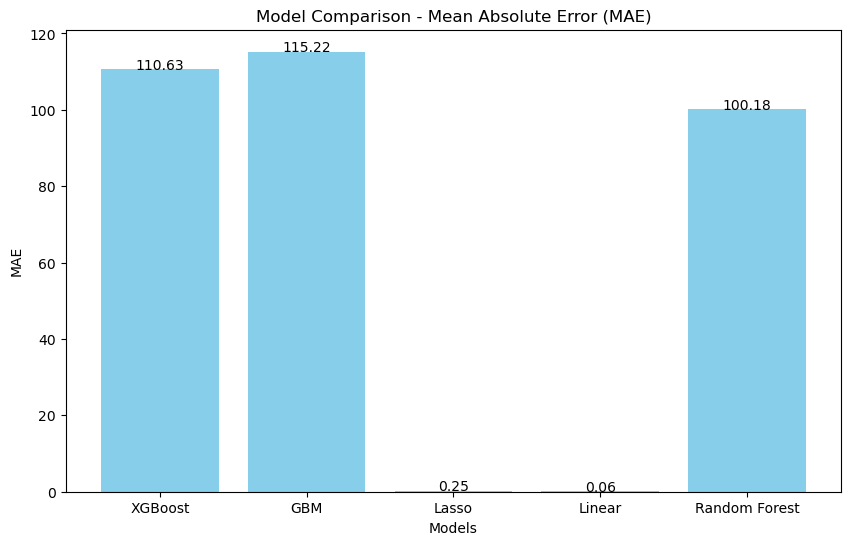

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Collect evaluation metrics
models = ['XGBoost', 'GBM', 'Lasso', 'Linear', 'Random Forest']
mae_scores = [xgb_mae, gbm_mae, lasso_mae, linear_mae, rf_mae]
mse_scores = [xgb_mse, gbm_mse, lasso_mse, linear_mse, rf_mse]
r2_scores = [xgb_r2, gbm_r2, lasso_r2, linear_r2, rf_r2]

# MAE Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(models, mae_scores, color='skyblue')

ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('Model Comparison - Mean Absolute Error (MAE)')

# Adding value labels on bars
for i in range(len(mae_scores)):
    ax.text(i, mae_scores[i] + 0.02, round(mae_scores[i], 2), ha='center')

plt.show()


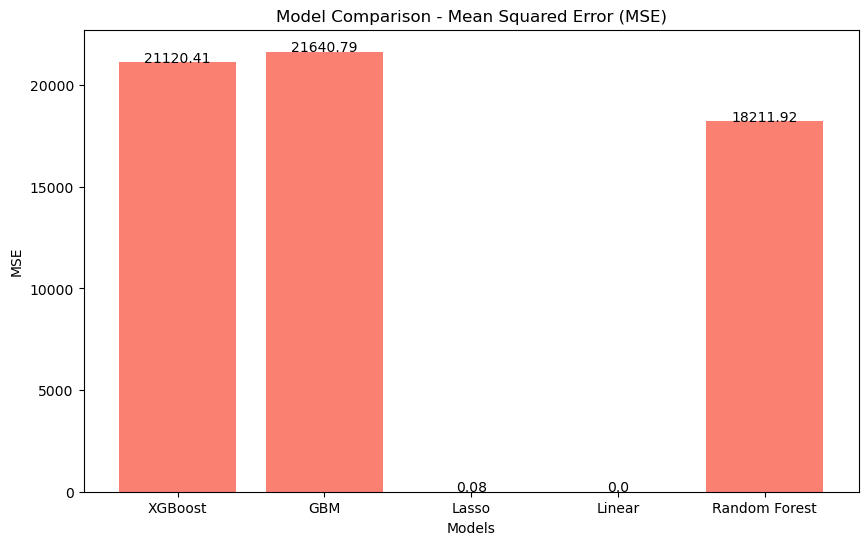

In [17]:
# MSE Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(models, mse_scores, color='salmon')

ax.set_xlabel('Models')
ax.set_ylabel('MSE')
ax.set_title('Model Comparison - Mean Squared Error (MSE)')

# Adding value labels on bars
for i in range(len(mse_scores)):
    ax.text(i, mse_scores[i] + 0.02, round(mse_scores[i], 2), ha='center')

plt.show()


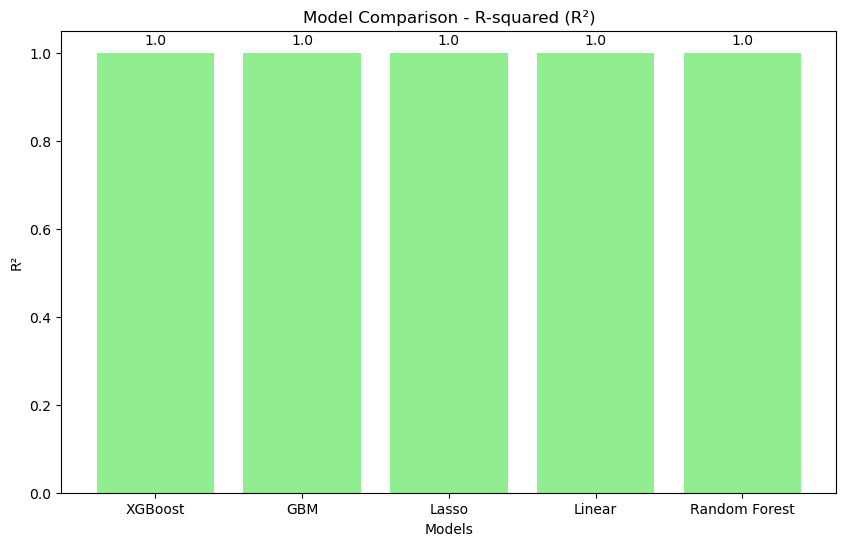

In [18]:
# R² Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(models, r2_scores, color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('R²')
ax.set_title('Model Comparison - R-squared (R²)')

# Adding value labels on bars
for i in range(len(r2_scores)):
    ax.text(i, r2_scores[i] + 0.02, round(r2_scores[i], 2), ha='center')

plt.show()


In [19]:
import joblib
from sklearn.linear_model import LinearRegression

# Assuming the model is already trained and named linear_model
joblib.dump(linear_model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']